# Handwritten  digit recognition in Tensorflow

TensorFlow is an interface for expressing machine learning algorithms, and implementations, was developed by the Google Brain team for internal Google use in research and production. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

Tenssorflow Keras module has MNIST(Modified National Institute of Standards and Technology) database of handwritten digits embedded which we have taken in this project for training a model and later on written digits with our own hands and tried to predict the digits with the model. The model is aalmost successfully able to predict our handwritten digits. 

## Import the libraries

In [2]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

Load the MNIST dataset from the Keras module

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(image_train, label_train), (image_test, label_test) = mnist.load_data()
image_train, image_test = image_train / 255.0, image_test / 255.0
print("image_train.shape:", image_train.shape[1])

image_train.shape: 28


In [5]:
    if tf.test.is_built_with_cuda():
      print("The installed version of TensorFlow includes GPU support.")

The installed version of TensorFlow includes GPU support.


In [11]:
#tf.debugging.set_log_device_placement(True)

#gpus = tf.config.list_logical_devices('GPU')
#strategy = tf.distribute.MirroredStrategy(gpus)
with tf.device('/device:GPU:0'):

    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10)
    ])

    tf.debugging.set_log_device_placement(True)


    predictions = model(image_train[:1]).numpy()

    print("predictions: \n", predictions)

    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    print("loss: \n", loss_fn(label_train[:1], predictions).numpy())


    model.compile(optimizer='adam',
                  loss=loss_fn,
                  metrics=['accuracy'])

    model.fit(image_train, label_train, epochs=5)

    print("evaluation: \n")

    model.evaluate(image_test,  label_test, verbose=2)

    probability_model = tf.keras.Sequential([
      model,
      tf.keras.layers.Softmax()
    ])

    print("probabilities: \n", probability_model(image_test[:5]))

predictions: 
 [[-0.04813766 -0.5368642  -0.81464607 -0.33518317  0.73481137  0.45232955
  -0.6416454  -0.29177195  0.53294694 -0.1831176 ]]
loss: 
 1.866387
Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2941 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1428 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1061 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0876 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0734 - accuracy: 0.9769
evaluation: 

313/313 - 1s - loss: 0.0780 - accuracy: 0.9761
probabilities: 
 tf.Tensor(
[[1.9045097e-09 4.8987694e-09 1.1179499e-05 1.1036873e-04 5.9056683e-11
  1.6427502e-07 8.9739346e-14 9.9987721e-01 2.9940736e-08 9.9437500e-07]
 [3.4266971e-09 4.2462627e-05 9.9995589e-01 1.4353006e-06 4.7591942e-17
  2.8949651e-07 1.8922177e

## Summary of the model

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Predict the test data
Predict the test data from the MNIST database and model is working fine with those input data

[7 2 1 ... 4 5 6]
(10000,)


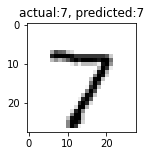

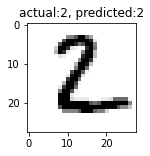

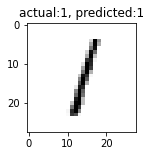

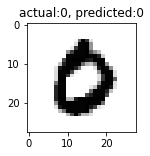

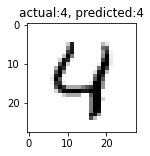

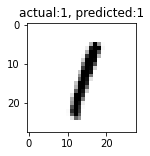

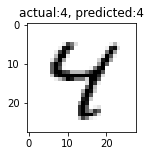

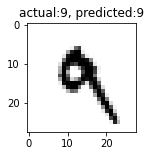

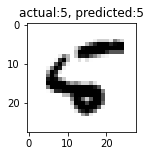

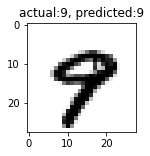

In [7]:
#hashmap
classes = {i:chr(i+48) for i in range(10)}
classes

# get an image and its actual label/class
# the batch size in data_test is 1, each batch contains 1 sample 

# predict label
test_label_pred = np.argmax(probability_model.predict(image_test), axis = 1)

print(test_label_pred)
print(test_label_pred.shape)

for i in range(10):
    plt.figure(figsize=(2, 2))
    plt.imshow(image_test[i], cmap='binary')
    plt.title(f'actual:{classes[label_test[i]]}, predicted:{classes[test_label_pred[i]]}')

In [15]:
!mkdir -p saved_model
model.save('saved_model/my_model')

ERROR: ld.so: object '/' from LD_PRELOAD cannot be preloaded (cannot read file data): ignored.
ERROR: ld.so: object '/' from LD_PRELOAD cannot be preloaded (cannot read file data): ignored.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


## Predict the handwritten digits
The following images were written with our hands and given as input to the model and the model is able to predict the digits almost correctly

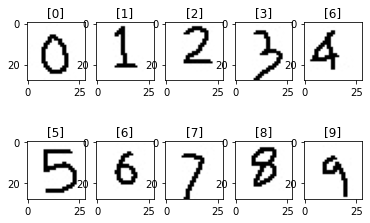

In [13]:
for i in range(10):
    filename = './data/'+str(i)+'.jpg'

    img = cv2.imread(filename)

    img = cv2. cvtColor(img, cv2.COLOR_BGR2GRAY)

    img=cv2.resize(img, (28,28)) # resize to 28,28 as that is on which model is trained on

    img = np.expand_dims(img, 2)

    img = ~img

    im = plt.subplot(2,5,i+1)
    
    plt.imshow(img,cmap='binary')
    
    img = tf.expand_dims(img, 0) # expand the dims means change shape from (180, 180, 3) to (1, 180, 180, 3)

    prediction = np.argmax(probability_model.predict(img), axis = 1)

    plt.title(prediction)